In [37]:
#load libraries
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [38]:
#get our training and test data
traindata = pd.read_csv('dataset/sign_mnist_train.csv')
testdata = pd.read_csv('dataset/sign_mnist_test.csv')

In [39]:
trainlabel=traindata['label'].values
testlabel=testdata['label'].values

In [40]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [41]:
trainimages=trainimages.reshape(-1,28,28,1)

testimages=testimages.reshape(-1,28,28,1)

In [42]:
print(traindata.shape)
print(testdata.shape)

(27455, 784)
(7172, 784)


In [43]:
from keras.preprocessing.image import ImageDataGenerator
traingen=ImageDataGenerator( rescale=1./255.0 )

traindata_generator = traingen.flow(trainimages,trainlabel, batch_size=128)
validationdata_generator = traingen.flow(testimages,testlabel, batch_size=128)

In [44]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(26,activation="softmax"))

In [45]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

In [47]:
history=model.fit(traindata_generator,epochs=50,validation_data=validationdata_generator)

Epoch 1/50
215/215 [==============================] - 34s 131ms/step - loss: 2.4158 - accuracy: 0.2473 - val_loss: 1.3332 - val_accuracy: 0.5754
Epoch 2/50
215/215 [==============================] - 33s 141ms/step - loss: 0.9186 - accuracy: 0.6834 - val_loss: 0.7623 - val_accuracy: 0.7083
Epoch 3/50
116/215 [===============>..............] - ETA: 13s - loss: 0.5530 - accuracy: 0.8109

In [ ]:
#saving the CNN training Accuracy to local folder 
_, acc_train = model.evaluate(traindata_generator)
print('CNN_SA Training Accuracy : %0.2f%%' % (acc_train * 100))

trainingAcc = ("%0.2f%%" % (acc_train * 100))
np.save('CNN/50epoch_SA_trainingAccuracy.npy', trainingAcc)

#saving the CNN test Accuracy to local folder 
_, acc_test = model.evaluate(validationdata_generator)
print('CNN_SA Test Accuracy : %0.2f%%' % (acc_test * 100))

TestAcc = ("%0.2f%%" % (acc_test * 100))
np.save('CNN/50epoch_SA_testAccuracy.npy', TestAcc)

215/215 [==============================] - 9s 43ms/step - loss: 0.0340 - accuracy: 0.9972
CNN_SA Training Accuracy : 99.72%
57/57 [==============================] - 2s 39ms/step - loss: 0.3233 - accuracy: 0.8935
CNN_SA Test Accuracy : 89.35%


In [ ]:
#save our model
model.save("CNN/50epoch_model.h5")
print("Model Saved")

Model Saved


In [ ]:
#saving the CNN training history to local folder 
np.save('CNN/50epoch_CNN_history.npy', history.history)

#load the CNN training validation accuracy to local folder 
val_accuracy = np.load('CNN/50epoch_SA_testAccuracy.npy', allow_pickle='TRUE').item()
#print('%0.2f%%' % (val_accuracy * 100))

#load the CNN training history from local folder
history = np.load('CNN/50epoch_CNN_history.npy', allow_pickle='TRUE').item()

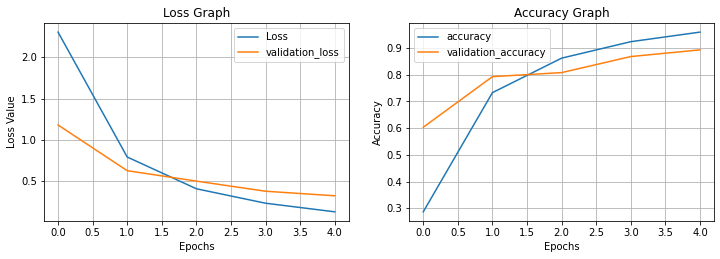

In [ ]:
#Plotting the accuracy training using graph presentation CNN
plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.ylabel('Loss Value')
plt.xlabel('Epochs')
plt.plot(history['loss'], label='Loss')
plt.plot(history['val_loss'], label='validation_loss')
plt.legend()
plt.grid()
plt.title('Loss Graph')

plt.subplot(2, 2, 2)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy Graph')

plt.show()

In [ ]:
#load the CNN training validation accuracy to local folder 
#val_accuracy = np.load('SA_History_models/1val_accuracy.npy', allow_pickle='TRUE').item()
#print('%0.2f%%' % (val_accuracy * 100))

#load the CNN training history from local folder
#history = np.load('SA_History_models/1history.npy', allow_pickle='TRUE').item()

In [ ]:
#getting training accuracy and loss data
training_accuracy = float(history['accuracy'][-1])
print('Training Accuracy: %0.2f%%' % (training_accuracy * 100))
training_loss = float(history['loss'][-1])
print('Training Loss: %0.2f%%' % (training_loss * 100))

validation_accuracy = float(history['val_accuracy'][-1])
print('\nValidation Accuracy: %0.2f%%' % (validation_accuracy * 100))
validation_loss = float(history['val_loss'][-1])
print('validation_loss Loss: %0.2f%%' % (validation_loss * 100))

Training Accuracy: 99.35%
Training Loss: 1.96%

Validation Accuracy: 99.44%
validation_loss Loss: 1.74%
